Classify drug based on age, gender, race

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv('Webmd_Drug_new.csv')

# 1. EXPLORATORY DATA ANALYSIS

In [3]:
# View first 5 rows of data
df.head()

Age      Condition       Date                          Drug  DrugId  \
0  75 or over    Stuffy Nose  9/21/2014                  25dph-7.5peh  146724   
1       25-34  Cold Symptoms  1/13/2011                  25dph-7.5peh  146724   
2       65-74          Other  7/16/2012  warfarin (bulk) 100 % powder  144731   
3  75 or over          Other  9/23/2010  warfarin (bulk) 100 % powder  144731   
4       35-44          Other   1/6/2009  warfarin (bulk) 100 % powder  144731   

   EaseofUse  Effectiveness  \
0          5              5   
1          5              5   
2          2              3   
3          2              2   
4          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3                       FALLING AND DON'T REALISE IT             1  Female   
4  My grandfather was prescribed this medication ...             1    Male   

                                               Sides  UsefulCount  \
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0   
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1   
2                                                               0   
3                                                               0   
4                                                               1   

               Name      Race  
0   Scott Robertson     White  
1     Rodney Wright     White  
2        Derek Ross  Hispanic  
3  Allison Martinez  Hispanic  
4      Joseph Hogan     White

In [4]:
# Dimension of combined dataset
df.shape

(362806, 14)

In [5]:
# Information about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Name           362806 non-null  object
 13  Race           362806 non-null  object
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [6]:
# Summarize the data by generating descriptive statistics of numerical columns
df.describe()

DrugId      EaseofUse  Effectiveness   Satisfaction  \
count  362806.000000  362806.000000  362806.000000  362806.000000   
mean    36879.370774       4.019829       3.532061       3.135408   
std     52624.412971       1.317711       1.455961       1.611106   
min         1.000000       1.000000       1.000000       1.000000   
25%      4896.000000       3.000000       3.000000       1.000000   
50%      9548.000000       5.000000       4.000000       3.000000   
75%     63522.000000       5.000000       5.000000       5.000000   
max    178546.000000      10.000000      10.000000      10.000000   

         UsefulCount  
count  362806.000000  
mean        6.744916  
std         9.324240  
min         0.000000  
25%         1.000000  
50%         4.000000  
75%         9.000000  
max       255.000000

### Find Missing values

In [7]:
# Find NaN values
df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Name              0
Race              0
dtype: int64

In [8]:
missing_nan = df.isnull()

# Check for other types of missing values (e.g., whitespace or empty strings)
missing_other = df.applymap(lambda x: isinstance(x, str) and x.isspace())

# Combine both types of missing values
missing_combined = missing_nan | missing_other

# Count the number of missing values in each column
missing_counts = missing_combined.sum()

# Print the missing value counts
print(missing_counts)

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41883
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
Name                 0
Race                 0
dtype: int64


In [9]:
# Find Duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Condition, Date, Drug, DrugId, EaseofUse, Effectiveness, Reviews, Satisfaction, Sex, Sides, UsefulCount, Name, Race]
Index: []

# 2. Preprocessing

### Handle missing values

In [10]:
# Drop rows with null values in-place
df.dropna(inplace=True)

In [11]:
# Replace white spaces and empty strings with NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Drop rows with any missing values (NaN, white spaces, empty strings)
df.dropna(inplace=True)

In [12]:
df.shape

(280113, 14)

In [13]:
# Condition	Date	Drug	DrugId	EaseofUse	Effectiveness	Reviews	Satisfaction	Sex	Sides	UsefulCount	Name	Race

### Unique values

In [14]:
# Iterate over the columns
for column in df.columns:
    # Get the unique values for the column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")


Column: Age
Unique Values: ['75 or over' '25-34' '45-54' '55-64' '19-24' '35-44' '13-18' '65-74'
 '7-12' '0-2' '3-6']
-----------------------
Column: Condition
Unique Values: ['Stuffy Nose' 'Cold Symptoms' 'Birth Control' ...
 'Combative and Explosive Behavior'
 'Sore Mouth due to Dentures or Poor Oral Hygiene' 'Lead Poisoning']
-----------------------
Column: Date
Unique Values: ['9/21/2014' '1/13/2011' '6/15/2017' ... '2/26/2018' '10/19/2019'
 '10/25/2019']
-----------------------
Column: Drug
Unique Values: ['25dph-7.5peh' 'wymzya fe' '12 hour nasal relief spray, non-aerosol' ...
 'chest congestion relief dm' 'chantix' 'chateal']
-----------------------
Column: DrugId
Unique Values: [146724 163180   9800 ...  94947 144470 163265]
-----------------------
Column: EaseofUse
Unique Values: [5 4 2 1 3 6]
-----------------------
Column: Effectiveness
Unique Values: [5 2 3 1 4 6]
-----------------------
Column: Reviews
Unique Values: ["I'm a retired physician and of all the meds I have tri

### Counts of Unique values

In [15]:
# Iterate over the columns
for column in df.columns:
    # Print the value counts for the column
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("-----------------------")


Column: Age
45-54         64124
55-64         57465
35-44         45467
25-34         42795
65-74         29979
19-24         21233
75 or over    10726
13-18          5974
7-12           1334
3-6             623
0-2             393
Name: Age, dtype: int64
-----------------------
Column: Condition
Other                                                                  38050
Pain                                                                   19081
High Blood Pressure                                                    17897
Depression                                                             11987
Birth Control                                                          10608
                                                                       ...  
Disease caused by the Worm Onchocerca Volvulus                             1
Prevent Inflammation of the Cornea due to the Medication Cytarabine        1
Aggressive Behavior                                                        1
Infection

### Handle Date column

In [16]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df['Date']

0        2014-09-21
1        2011-01-13
6        2017-06-15
7        2017-01-30
9        2012-10-29
            ...    
362799   2008-11-16
362801   2008-11-14
362803   2008-11-13
362804   2008-11-13
362805   2008-11-12
Name: Date, Length: 280113, dtype: datetime64[ns]

### Handle Sex column

In [17]:
# Replace 'M' with 'Male' and 'F' with 'Female' in the 'Sex' column
# df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})

### Handle Age Column

In [18]:
df['Age'] = df['Age'].replace({'75 or over': '75+'})

# 3. Visualization

### Age distribution

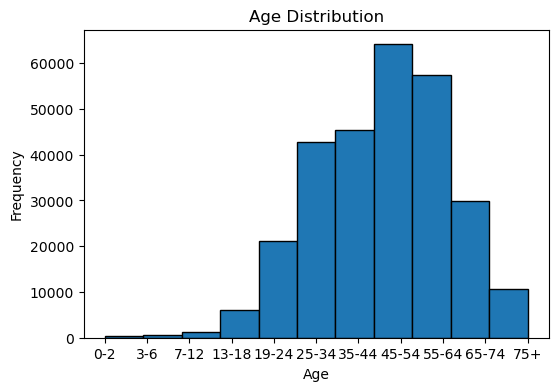

In [19]:
# Define the desired order of age categories
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].map({category: i for i, category in enumerate(age_order)})

plt.figure(figsize=(6, 4))

# Create histogram
plt.hist(age_numeric, bins=len(age_order), edgecolor='black')

# Set x-axis tick labels
plt.xticks(range(len(age_order)), age_order)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()


### Top 10 Conditions

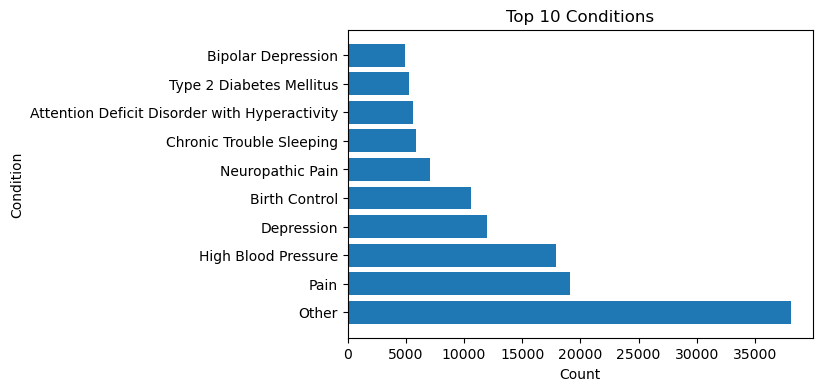

In [20]:
# Condition counts data
condition_counts = df['Condition'].value_counts()

# Select the top N conditions to display
top_n = 10
top_conditions = condition_counts.head(top_n)

plt.figure(figsize=(6, 4))

# Create bar plot
plt.barh(top_conditions.index, top_conditions)

# Set labels and title for bar plot
plt.xlabel('Count')
plt.ylabel('Condition')
plt.title(f'Top {top_n} Conditions')

# Show the bar plot
plt.show()


### Top 10 Drugs

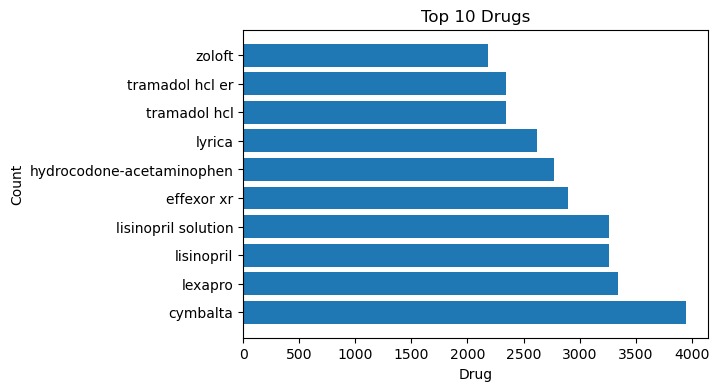

In [21]:
# Drug distribution data
drug_counts = df['Drug'].value_counts()

# Select the top N drugs to display
top_n = 10
top_drugs = drug_counts.head(top_n)

plt.figure(figsize=(6, 4))

# Create horizontal bar plot
plt.barh(top_drugs.index, top_drugs)

# Set labels and title for horizontal bar plot
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title(f'Top {top_n} Drugs')

# Show the horizontal bar plot
plt.show()


### Ease Of Use distribution

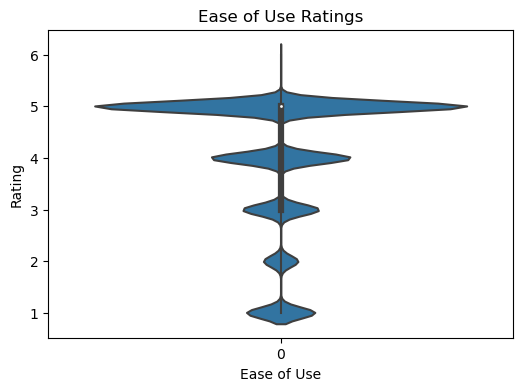

In [22]:
plt.figure(figsize=(6, 4))

# Create a violin plot
sns.violinplot(data=df['EaseofUse'])

# Set labels and title
plt.xlabel('Ease of Use')
plt.ylabel('Rating')
plt.title('Ease of Use Ratings')

# Show the plot
plt.show()


### Effectiveness Distribution

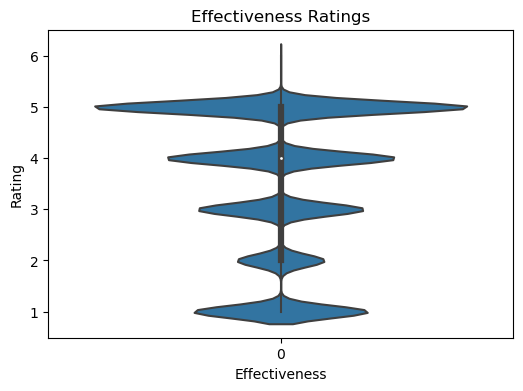

In [23]:
plt.figure(figsize=(6, 4))

# Create a violin plot
sns.violinplot(data=df['Effectiveness'])

# Set labels and title
plt.xlabel('Effectiveness')
plt.ylabel('Rating')
plt.title('Effectiveness Ratings')

# Show the plot
plt.show()


### Satisfaction Distribution

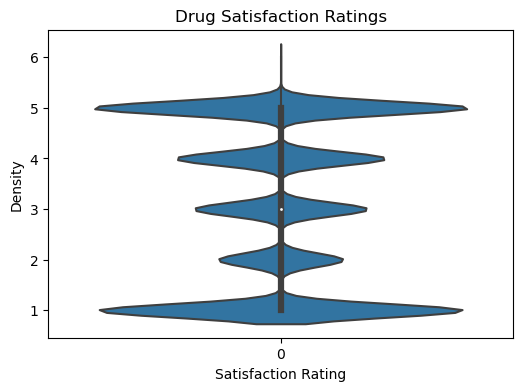

In [24]:
plt.figure(figsize=(6, 4))

# Create a violin plot
sns.violinplot(data=df['Satisfaction'])

# Set labels and title
plt.xlabel('Satisfaction Rating')
plt.ylabel('Density')
plt.title('Drug Satisfaction Ratings')

# Show the plot
plt.show()

### Useful Count Distribution

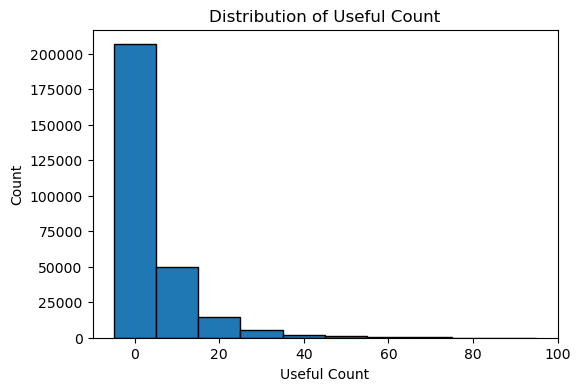

In [25]:
# UsefulCount data
useful_counts = df['UsefulCount']

# Define the bin edges for the bar plot
bin_edges = np.arange(0, 101, 10)

# Count the number of counts falling into each bin
bin_counts, _ = np.histogram(useful_counts, bins=bin_edges)

plt.figure(figsize=(6, 4))

# Create bar plot
plt.bar(bin_edges[:-1], bin_counts, width=10, edgecolor='black')

# Set labels and title for bar plot
plt.xlabel('Useful Count')
plt.ylabel('Count')
plt.title('Distribution of Useful Count')

# Show the bar plot
plt.show()


### Gender distribution data

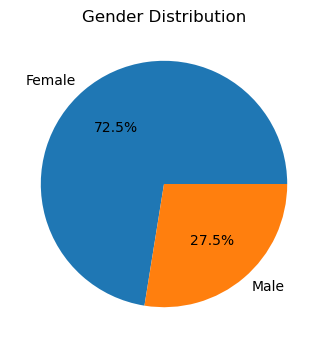

In [26]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(4, 4))

# Create pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Gender Distribution')

# Show the pie chart
plt.show()

### Race distribution data

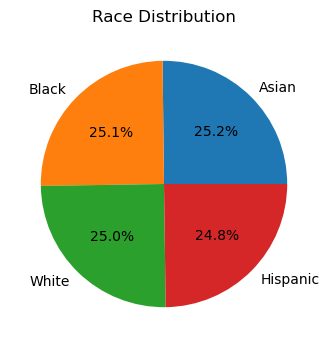

In [27]:
race_counts = df['Race'].value_counts()

plt.figure(figsize=(4, 4))

# Create pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Race Distribution')

# Show the pie chart
plt.show()


### Count plots

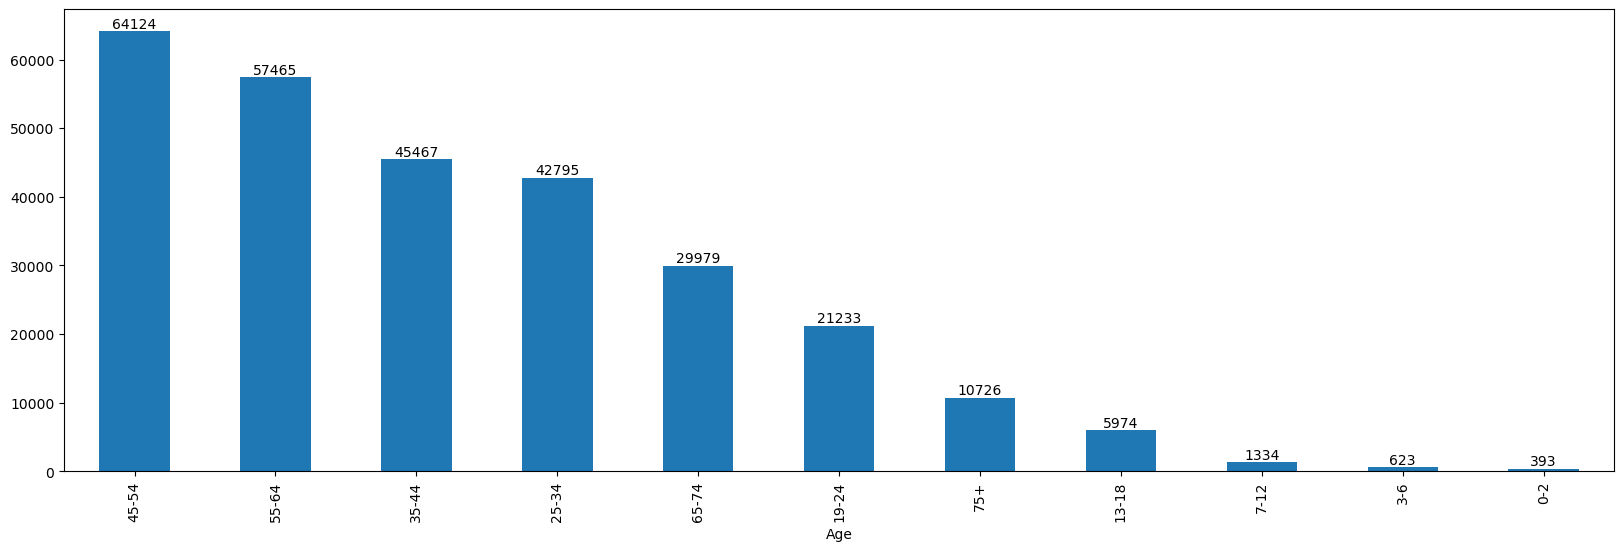

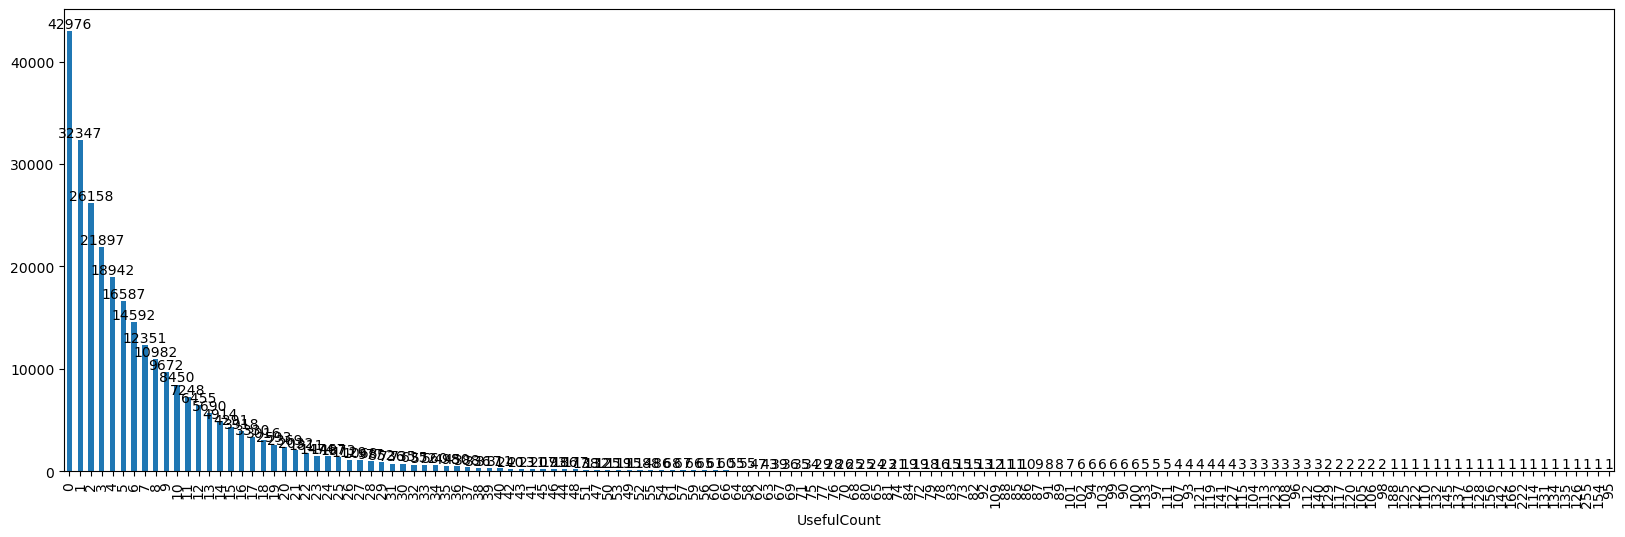

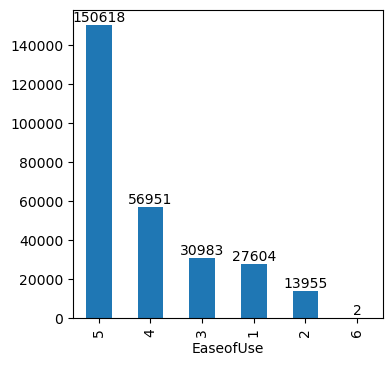

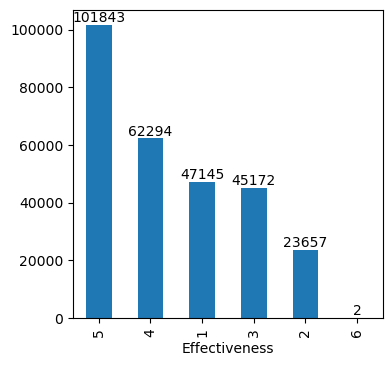

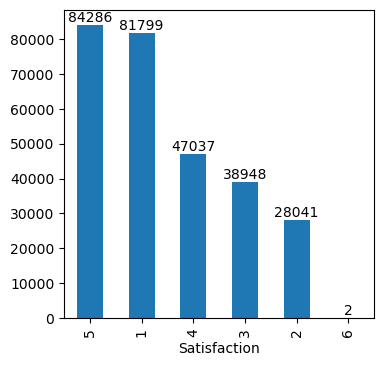

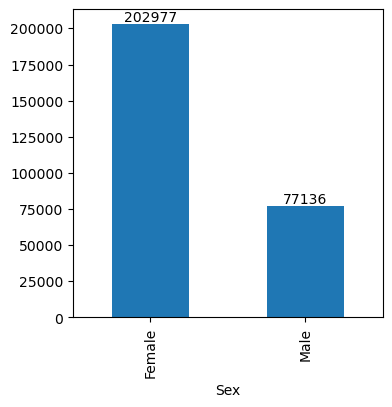

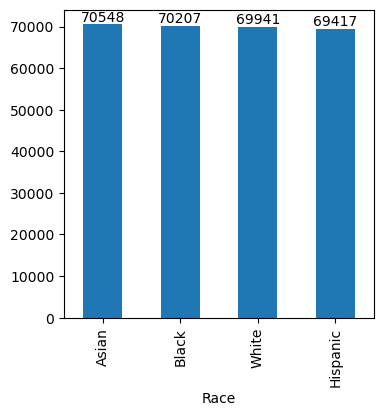

In [28]:
# Specify the columns to create bar plots for
columns = ['Age', 'UsefulCount', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'Sex', 'Race']

for column in columns:
    # Set the figure size
    if column in ['Age','UsefulCount']:
        plt.figure(figsize=(20, 6))
    else:
        plt.figure(figsize=(4, 4))
    # Create a bar plot for the column
    plot = df[column].value_counts().plot(kind='bar')
    
    # Set the x-axis label to the column name
    plt.xlabel(column)
    
    # Rotate the x-axis labels for better readability
    #plt.xticks(rotation=45, ha='right')
    
    # Show the values on top of the bars
    for i, value in enumerate(df[column].value_counts()):
        plt.text(i, value, str(value), ha='center', va='bottom')
    
    # Show the plot for the current column
    plt.show()

### Analyze and visualize the satisfaction levels of top 10 drugs

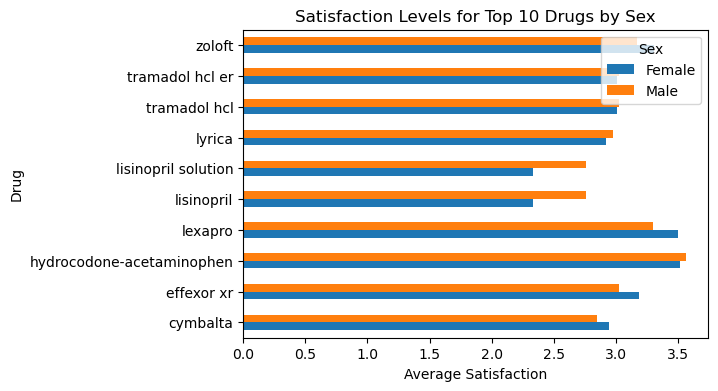

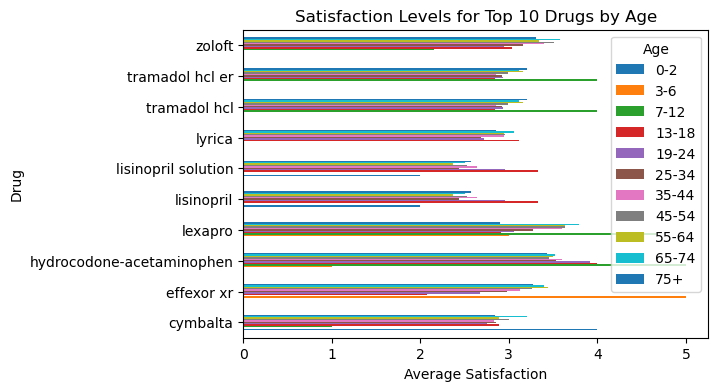

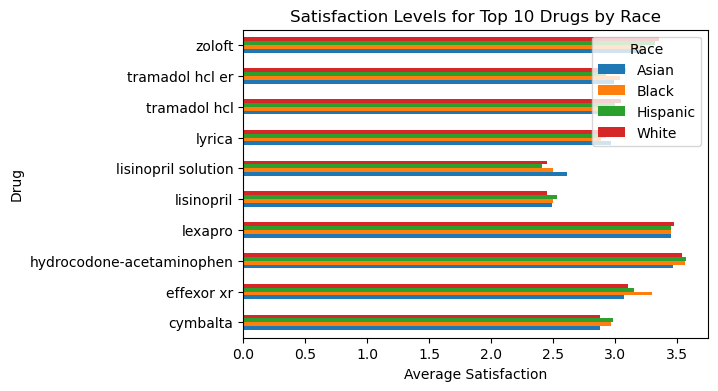

In [29]:
# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the DataFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Define the parameters for plotting
parameters = [('Sex', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Sex', 'Sex'),
              ('Age', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Age', 'Age'),
              ('Race', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Race', 'Race')]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title in parameters:
    # Group the filtered data by 'Drug' and the current parameter, and calculate the average satisfaction
    grouped_df = filtered_df.groupby(['Drug', param])['Satisfaction'].mean().unstack()

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6, 4))

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Average Satisfaction')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper right')

    # Show the plot
    plt.show()


### Visualize the effectives levels of top 10 drugs

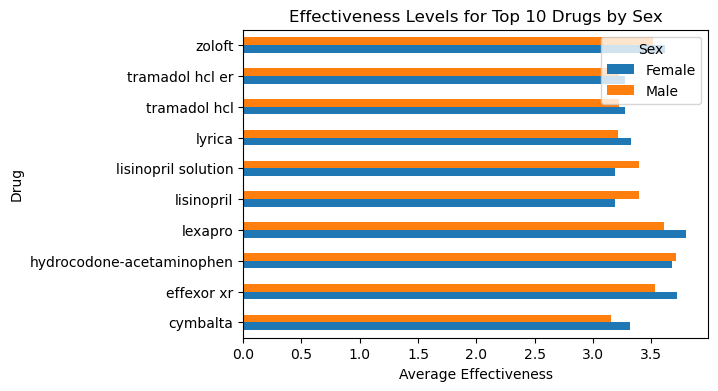

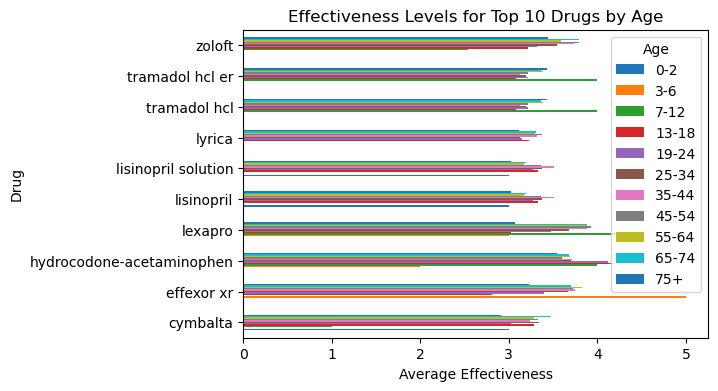

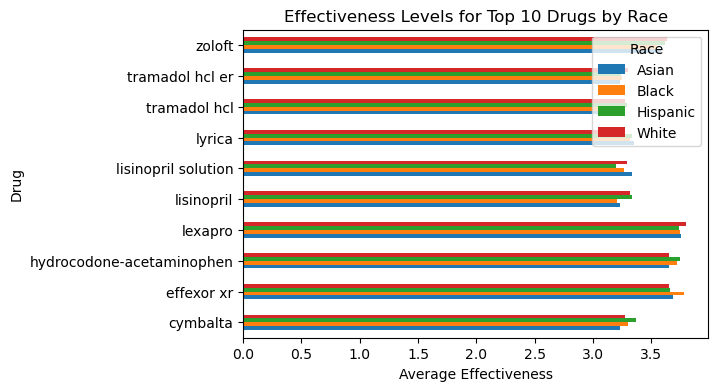

In [30]:
# Define the parameters for plotting
parameters = [('Sex', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Sex', 'Sex'),
              ('Age', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Age', 'Age'),
              ('Race', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Race', 'Race')]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title in parameters:
    # Group the filtered data by 'Drug' and the current parameter, and calculate the average effectiveness
    grouped_df = filtered_df.groupby(['Drug', param])['Effectiveness'].mean().unstack()

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6, 4))

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Average Effectiveness')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper right')

    # Show the plot
    plt.show()


### Visualize the Ease of use of top 10 drugs

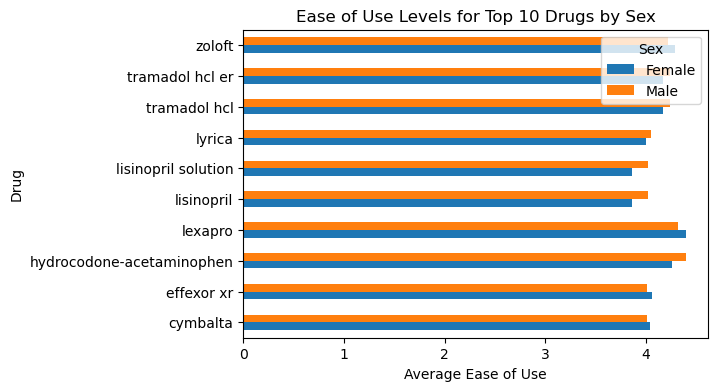

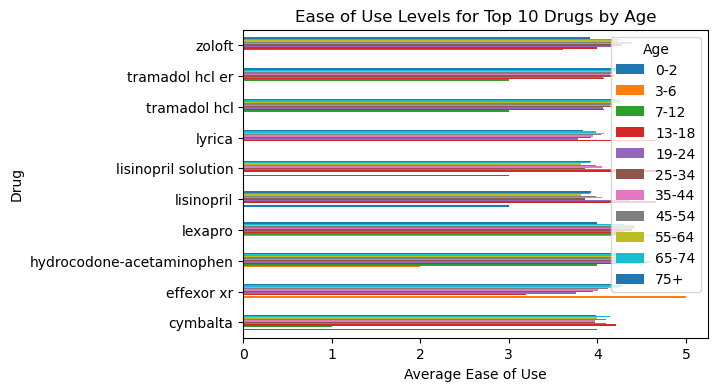

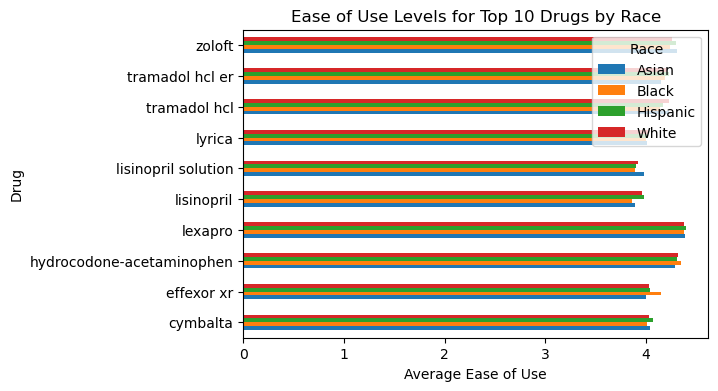

In [31]:
# Define the parameters for plotting
parameters = [('Sex', 'EaseofUse', 'Ease of Use Levels for Top 10 Drugs by Sex', 'Sex'),
              ('Age', 'EaseofUse', 'Ease of Use Levels for Top 10 Drugs by Age', 'Age'),
              ('Race', 'EaseofUse', 'Ease of Use Levels for Top 10 Drugs by Race', 'Race')]

# Iterate over the parameters and generate the plots for EaseofUse
for param, ylabel, title, legend_title in parameters:
    # Group the filtered data by 'Drug' and the current parameter, and calculate the average ease of use
    grouped_df = filtered_df.groupby(['Drug', param])['EaseofUse'].mean().unstack()

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6, 4))

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Average Ease of Use')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper right')

    # Show the plot
    plt.show()


In [32]:
# Time series Analysis

In [33]:
### Top 10 conditions and their corresponding effectiveness ratings 

In [34]:
import plotly.graph_objects as go


# Group the data by "Condition" and calculate the mean effectiveness for each condition over time
grouped_df = df.groupby(['Condition', pd.Grouper(key='Date', freq='M')])['Effectiveness'].mean().unstack(level=0)

# Select the top 10 conditions based on the average effectiveness rating
top_10_conditions = grouped_df.mean().nlargest(10).index

# Filter the grouped data for the top 10 conditions
filtered_df = grouped_df[top_10_conditions]

# Create an interactive area plot using Plotly
fig = go.Figure()

for column in filtered_df.columns:
    fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df[column], mode='lines', stackgroup='one', name=column))

fig.update_layout(
    title='Effectiveness of Top 10 Conditions Over Time',
    xaxis_title='Date',
    yaxis_title='Effectiveness',
    hovermode='x',
    showlegend=True
)

fig.update_traces(hovertemplate='%{y:.2f}')
fig.show()

In [35]:
### Outliers

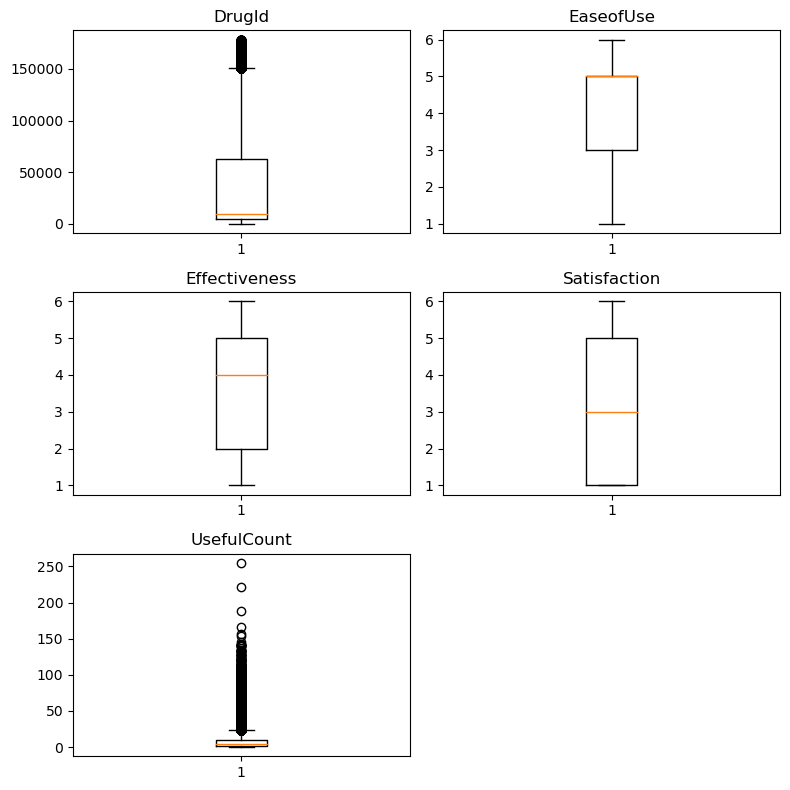

In [36]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols.columns)
num_rows = int(np.ceil(num_cols / 2))

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 8))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(numeric_cols.columns):
    axs[i].boxplot(numeric_cols[column])
    axs[i].set_title(column)

# Hide empty subplots if there are an odd number of plots
if num_cols % 2 != 0:
    axs[-1].axis('off')

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()


Outlier is found in Column 'UsefulCount'

### Outlier handling using Interquartile range

In [37]:
"""from scipy import stats
# Calculate the IQR
IQR =stats.iqr(df.UsefulCount,interpolation='midpoint')
Q1=df.UsefulCount.quantile(0.25)
Q3=df.UsefulCount.quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit  """

"from scipy import stats\n# Calculate the IQR\nIQR =stats.iqr(df.UsefulCount,interpolation='midpoint')\nQ1=df.UsefulCount.quantile(0.25)\nQ3=df.UsefulCount.quantile(0.75)\n# Define the lower and upper thresholds\nmin_limit=Q1-1.5*IQR\nmax_limit=Q3+1.5*IQR\nmin_limit,max_limit  "

In [38]:
# Checking lower outliers
#df.loc[df.UsefulCount<min_limit]

There are no lower Outliers

In [39]:
# Checking upper outliers
"""filtered_df = df.loc[df.UsefulCount>max_limit]
first_five_rows = filtered_df.head()
first_five_rows"""

'filtered_df = df.loc[df.UsefulCount>max_limit]\nfirst_five_rows = filtered_df.head()\nfirst_five_rows'

Upper Outliers are present

In [40]:
# Remove upper outliers
#df.loc[df['UsefulCount']>max_limit,'UsefulCount']=np.median(df.UsefulCount)

In [41]:
#df.loc[df.UsefulCount>max_limit]

### Handle Sides column to create a new column 'SideEffects'

In [42]:
import nltk
from nltk.corpus import stopwords

# Tokenize words in the 'Sides' column
tokenized_sides = df['Sides'].apply(lambda x: nltk.word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = tokenized_sides.apply(lambda x: [token for token in x if token not in stop_words])

# Create a set of unique tokens
unique_tokens = set([token for sublist in filtered_tokens for token in sublist])

# Print the unique tokens
for token in unique_tokens:
    print(token)


tartar
baloxavir
urge
tingling/burning
risk
toenail
/phlegm
abdomen
pain/bruising/redness/swelling/
leak
feeding
toenails
stain
tastes
vomiting
ringing
sleepiness
breathing
irritation/pain
marboxil
stool
goes
expected
spasms
energy
/urination
soreness/redness/swelling/bruising
discomfort/pain
problems
two
eyelash
sperm
redness/
tingling/numbness/prickling
gut
aftertaste
time
drink
folic
medications
semen/
taste/smell
numb/tingling
young
speaking
dry/
tenderness/enlargement
gas
promptly
benefit
interest/ability
week
/pain
/gum
slow
male
permethrin
area
abdominal
runny
mildly
tongue
bruising
reports
bleeds
dry/peeling/oily
discomfort/irritation/redness
pyridoxine
number/color/length/thickness
fish
infusion
exaggerated
excitement
irritation/redness/pain
allergy
days
swallowing
reduced
painful
peeling/burning/dry/reddened
tell
warmth
fingernails
bruising/bleeding
redness/discomfort/pain/swelling
minute
bones
penis
cycle
right
little
1
worsening
metallic/garlic-like
move
lice
sex
levodopa-c

In [43]:
# Define the side effect categories
nil_keywords = []
mild_effects = []
moderate_effects = []
severe_effects = []
lethal_keywords = []


# Define the keywords for each severity level
nil_keywords = ['fine', 'clear','no side effects']
mild_keywords = ['drowsiness','constipation', 'dry/irritated throat','taste/dryness', 'dryness', 'bad taste', 'slight', 'yawning', 'pale', 'headache', 'ache/pain', 'oily', 'runny', 'tingling/numbness/prickling', 'dizziness', 'nausea', 'fatigue', 'redness/swelling', 'ringing', 'flushing', 'shaking', 'tingling', 'mild', 'burping', 'infrequent', 'stuffy', 'tiredness' 'lightheadedness', 'bloating', 'slow', 'cough', 'sneezing', 'fever/chills', 'vomiting', 'fever', 'abdominal/pelvic pain', 'upset', 'upset stomach','muscle', 'muscle pain', 'Dry/cracked lips', 'diarrhea /loose stools','trouble sleeping', 'difficulty sleeping', 'sleep  patterns', 'dry mouth /nose/throat','cramps', 'heartburn']

moderate_keywords = ['serious side effects', 'burning', 'flaking', 'itchy', 'dryness/irritation', 'skin  irritation', 'abnormal', 'breast tenderness', 'discoloration', 'dryness/irritation/scabbing', 'itching/redness', 'dryness/redness/itchiness', 'pain/irritation', 'pain/swelling', 'walking/clumsiness', 
                   'difficulty urinating', 'Penis /testicle/groin pain', 'breast pain/swelling/tenderness', 'breast pain', 'muscle/bone pain', 'discomfort/irritation/redness', 'tremors', 'swollen glands', 'irritability', 'bleeding','shortness of breath', 'periods']
severe_keywords = ['liver failure', 'abnormal heart rhythms', 'hospitalization', 'birth defects']
lethal_keywords = ['dead','died','death']

# Perform feature engineering and classify side effects
side_effects = []

for side_effect in df['Sides']:
    side_effect_lower = side_effect.lower()
    
    if any(keyword in side_effect_lower for keyword in lethal_keywords):
        side_effects.append('Lethal')
    elif any(keyword in side_effect_lower for keyword in severe_keywords):
        side_effects.append('Severe')    
    elif any(keyword in side_effect_lower for keyword in moderate_keywords):
        side_effects.append('Moderate')
    elif any(keyword in side_effect_lower for keyword in mild_keywords):
        side_effects.append('Mild')
    else:
        side_effects.append('Nil')

# Add the SideEffects column to the dataset
df['SideEffects'] = side_effects

In [44]:
df.head()

Age                      Condition       Date  \
0    75+                    Stuffy Nose 2014-09-21   
1  25-34                  Cold Symptoms 2011-01-13   
6  25-34                  Birth Control 2017-06-15   
7  45-54  Disease of Ovaries with Cysts 2017-01-30   
9  55-64                    Stuffy Nose 2012-10-29   

                                      Drug  DrugId  EaseofUse  Effectiveness  \
0                             25dph-7.5peh  146724          5              5   
1                             25dph-7.5peh  146724          5              5   
6                                wymzya fe  163180          5              5   
7                                wymzya fe  163180          5              5   
9  12 hour nasal relief spray, non-aerosol    9800          4              2   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
6  Haven't gotten pregnant so it does it's job. I...             2  Female   
7  I have take this for 5 years age 45-50 to prev...             5  Female   
9   The 12 hour spray only works for me for 6 hours.             2    Male   

                                               Sides  UsefulCount  \
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0   
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1   
6  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0   
7  Nausea ,  vomiting ,  headache ,  bloating ,  ...            0   
9  Temporary burning, stinging, dryness in the no...            0   

                Name      Race SideEffects  
0    Scott Robertson     White        Mild  
1      Rodney Wright     White        Mild  
6      Andrew Miller  Hispanic        Mild  
7  Christina Anthony     Black        Mild  
9        Paul Warren     Asian    Moderate

In [45]:
df['SideEffects'].value_counts()

Mild        245765
Moderate     21935
Nil          12413
Name: SideEffects, dtype: int64

In [47]:
#Save the DataFrame as a CSV file
df.to_csv('Drug_SideEffects_new.csv', index=False)

### Side Effects of Top 10 drugs

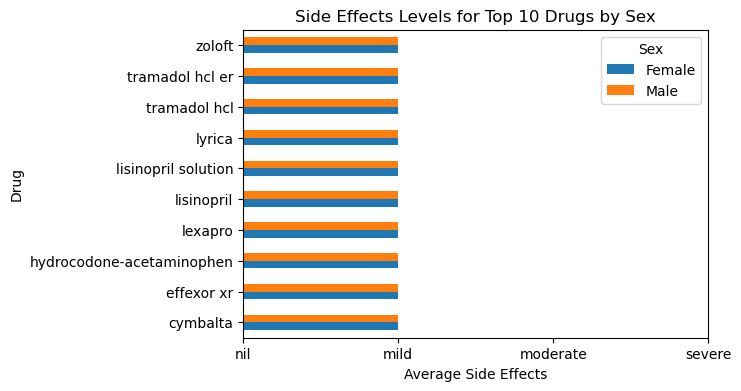

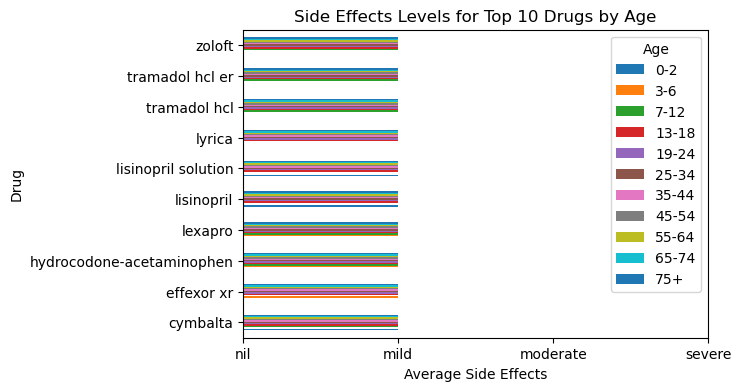

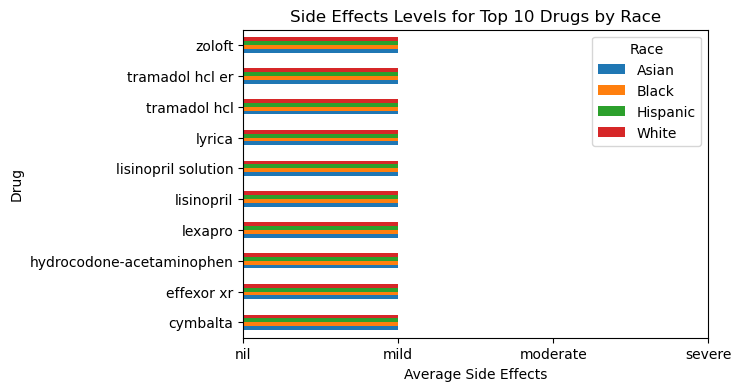

In [48]:
# Define a mapping for side effect categories
side_effects_mapping = {'nil': 0, 'mild': 1, 'moderate': 2, 'severe': 3}

# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the DataFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Convert side effects to lowercase and use the mapping
filtered_df['SideEffects'] = filtered_df['SideEffects'].str.lower().map(side_effects_mapping)

# Define the parameters for plotting
parameters = [('Sex', 'SideEffects', 'Side Effects Levels for Top 10 Drugs by Sex', 'Sex'),
              ('Age', 'SideEffects', 'Side Effects Levels for Top 10 Drugs by Age', 'Age'),
              ('Race', 'SideEffects', 'Side Effects Levels for Top 10 Drugs by Race', 'Race')]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title in parameters:
    # Group the filtered data by 'Drug' and the current parameter, and calculate the average side effects
    grouped_df = filtered_df.groupby(['Drug', param])['SideEffects'].mean().unstack()

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6, 4))

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Average Side Effects')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper right')

    # Set the x-axis tick locations and labels
    plt.xticks(range(4), ['nil', 'mild', 'moderate', 'severe'])

    # Show the plot
    plt.show()


In [49]:
# Group the data by "Drug" and "Date" and calculate the count of side effects
grouped_df = filtered_df.groupby(['Drug', pd.Grouper(key='Date', freq='M')])['SideEffects'].count().unstack(level=0)

# Create an interactive area plot using Plotly
fig = go.Figure()

for column in grouped_df.columns:
    fig.add_trace(go.Scatter(
        x=grouped_df.index,
        y=grouped_df[column],
        mode='lines',
        stackgroup='one',
        name=column
    ))

fig.update_layout(
    title='Side Effects of Top 10 Drugs Over Time',
    xaxis_title='Date',
    yaxis_title='Count of Side Effects',
    hovermode='x',
    showlegend=True
)

fig.show()


In [50]:
# Drop unwanted columns
columns_to_drop = ['Condition', 'Date','EaseofUse','Effectiveness','Reviews','Satisfaction','UsefulCount','Name']
df = df.drop(columns_to_drop, axis=1)
df.head()

Age                                     Drug  DrugId     Sex  \
0    75+                             25dph-7.5peh  146724    Male   
1  25-34                             25dph-7.5peh  146724  Female   
6  25-34                                wymzya fe  163180  Female   
7  45-54                                wymzya fe  163180  Female   
9  55-64  12 hour nasal relief spray, non-aerosol    9800    Male   

                                               Sides      Race SideEffects  
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...     White        Mild  
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...     White        Mild  
6  Nausea ,  vomiting ,  headache ,  bloating ,  ...  Hispanic        Mild  
7  Nausea ,  vomiting ,  headache ,  bloating ,  ...     Black        Mild  
9  Temporary burning, stinging, dryness in the no...     Asian    Moderate